In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMGN', 'AMZN',
    'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD', 'DDOG',
    'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED',
    'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD', 'LULU', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP',
    'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TSLA', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN',
    'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'APT', 'CTSH', 'CUBE', 'DTST', 'EP', 'EXR', 'FCPT',
    'FCUV', 'GBOX', 'GGE', 'GME', 'INTZ', 'KREF', 'LFMD', 'MCVT',
    'MNMD', 'PETV', 'POWW', 'PRPH', 'RA', 'RVP', 'VIRT', 'WAVD', 'WKHS',
    'ZYXI']
BEST_WEIGHTED = [
    'BTTR', 'BYRN', 'CEF', 'CGAU', 'CIZN', 'CTGO', 'DYAI', 'HMY',
    'HNRG', 'IEI', 'MICS', 'MIY', 'MMU', 'MUE', 'NPV', 'NXN', 'NXP',
    'OMQS', 'PYR', 'SOBR']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

75

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-10-08', datetime.date(2022, 10, 8))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  125 of 125 completed
Generating derived columns...
AAPL... ABMD... ABNB... ADBE... ADYEY... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BTTR... BYND... BYRN... CEF... CGAU... CHWY... CIZN... CRWD... CTGO... CTSH... CUBE... DDOG... DOCS... DOCU... DTST... DUOL... DYAI... EDIT... EP... ETSY... EXR... FCPT... FCUV... FLGT... GBOX... GGE... GH... GME... GMED... GOOG... HMY... HNRG... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MCVT... MDB... MELI... MICS... MIY... MMU... MNMD... MNST... MSFT... MTCH... MUE... NPV... NVCR... NVDA... NXN... NXP... ODFL... OKTA... OMQS... OPEN... PAC... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... PYR... QDEL... RA... RBLX... RDFN... RGEN... RIVN... ROKU... RVLV... RVP... SE... SHOP... SNOW... SOBR... TASK... TDOC... TEAM... TREX... TSLA... TTD... TTWO... TWLO... TWTR... TYL... UPST... VEEV... VIRT... VLD... VRTX...

In [5]:
data['Date'].tail()

2512   2022-10-03
2513   2022-10-04
2514   2022-10-05
2515   2022-10-06
2516   2022-10-07
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.990109
2       0.993812
3       1.000195
4       0.997034
5       1.008078
          ...   
2512    1.025884
2513    1.030584
2514    0.997982
2515    0.989755
2516    0.971996
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.000000
2,1.000317
3,1.006150
4,1.003540
5,1.011838
...,...
2512,1.035176
2513,1.061644
2514,1.004590
2515,1.010353


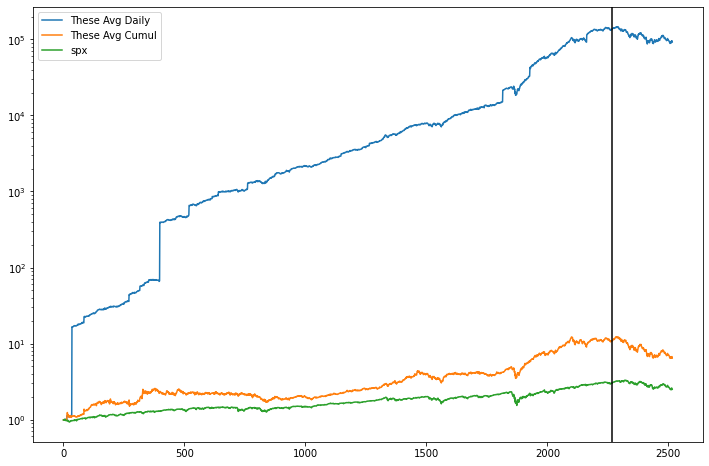

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-10-08,NaN,NaN
1,2012-10-09,0.990048,0.990048
2,2012-10-10,0.984114,0.983744
3,2012-10-11,0.988247,0.985499
4,2012-10-12,0.989368,0.982809


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-10-03,91354.286714,6.476391
2513,2022-10-04,95462.172197,6.723247
2514,2022-10-05,94679.670491,6.680053
2515,2022-10-06,96002.075135,6.741854
2516,2022-10-07,92206.780712,6.430913


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

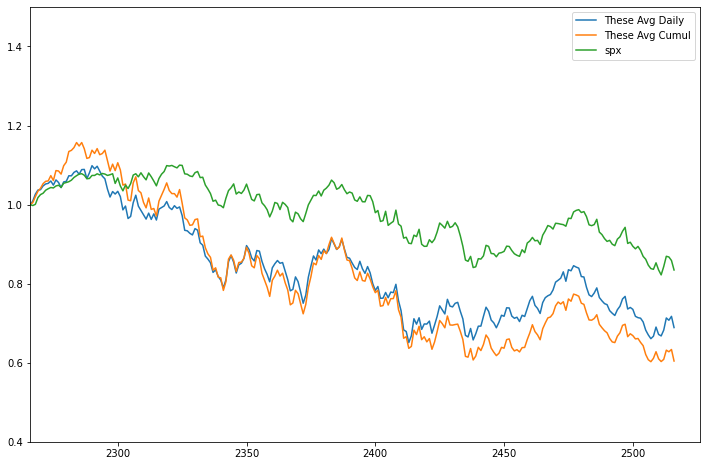

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2457,69.150002,69.150002,69.330002,66.519997,68.800003,4.236278,1.005087,1.020212,1.015049
2458,69.250000,69.250000,72.699997,68.870003,71.389999,4.237723,0.970024,1.001446,1.032393
2459,75.349998,75.349998,76.029999,70.730003,71.730003,4.322144,1.050467,1.088087,1.035812
2460,78.519997,78.519997,78.820000,72.559998,73.709999,4.363353,1.065256,1.042070,0.978235
2461,83.389999,83.389999,84.489998,77.790001,78.000000,4.423528,1.069103,1.062022,0.993378


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2457,69.150002,69.150002,69.330002,66.519997
2458,69.250000,69.250000,72.699997,68.870003
2459,75.349998,75.349998,76.029999,70.730003
2460,78.519997,78.519997,78.820000,72.559998
2461,83.389999,83.389999,84.489998,77.790001


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2457,69.150002,69.150002,69.330002,66.519997,72.699997,68.870003,1.051338,0.995951
2458,69.250000,69.250000,72.699997,68.870003,76.029999,70.730003,1.097906,1.021372
2459,75.349998,75.349998,76.029999,70.730003,78.820000,72.559998,1.046052,0.962973
2460,78.519997,78.519997,78.820000,72.559998,84.489998,77.790001,1.076032,0.990703
2461,83.389999,83.389999,84.489998,77.790001,82.500000,75.690002,0.989327,0.907663


0.05    0.972511
Name: HighMult, dtype: float64


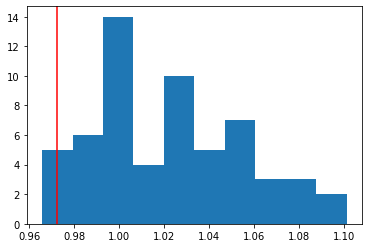

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.016548235714528


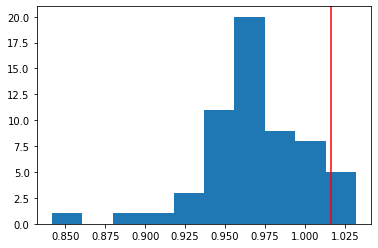

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.016548235714528, 0.9725107768702285)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.012031629887652, 0.9896874903139407)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2457,69.150002,69.150002,69.330002,66.519997,72.699997,68.870003,1.051338,0.995951,0
2458,69.250000,69.250000,72.699997,68.870003,76.029999,70.730003,1.097906,1.021372,1
2459,75.349998,75.349998,76.029999,70.730003,78.820000,72.559998,1.046052,0.962973,1
2460,78.519997,78.519997,78.820000,72.559998,84.489998,77.790001,1.076032,0.990703,1
2461,83.389999,83.389999,84.489998,77.790001,82.500000,75.690002,0.989327,0.907663,1


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0152574051008125,
 0.9851827090784792,
 1.0195602914522703,
 0.9717812023607786)

In [27]:
get_hilo_mults(aapl)

(1.0103545576727777, 0.998294653551031, 1.0078424704122075, 0.9833138191759903)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.010355,0.998295,1.007842,0.983314
1,ABMD,1.000737,0.989942,1.010093,0.992576
2,ABNB,1.017770,0.984826,1.012679,0.991620
3,ADBE,1.005738,0.990159,1.011903,0.970441
4,ADYEY,1.021979,0.957722,1.038115,0.955919


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,140.089996,AAPL
ABMD,257.089996,ABMD
ABNB,108.540001,ABNB
ADBE,288.769989,ADBE
ADYEY,12.74,ADYEY
...,...,...
ZM,76.589996,ZM
ZYXI,8.8,ZYXI
^GSPC,3639.659912,^GSPC
^IXIC,10652.400391,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.010355,0.998295,1.007842,0.983314,140.089996
1,ABMD,1.000737,0.989942,1.010093,0.992576,257.089996
2,ABNB,1.017770,0.984826,1.012679,0.991620,108.540001
3,ADBE,1.005738,0.990159,1.011903,0.970441,288.769989
4,ADYEY,1.021979,0.957722,1.038115,0.955919,12.74


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv